### Approach (pseudocode for Naive Bayes Model)

#### Input: Train and Test datasets
#### Output: A .csv file with PassengerId and predicted Survived passengers features are displayed
#### Steps:
#### 1. Preparing the train and test datasets
#### 2. Performing Data Exploration on train and test datasets
#### 2. a. Data Cleaning
#### 2. b. Data Visualization along with Heat Map
#### 2. c. Feature Engineering
#### 3. Feature Selection
#### 4. Built ML model based on Gaussian Naive Bayes
#### 4.a. Calculating mean and variance for each column grouped by class for the train dataset. Also calculated the prior probability for each class which is the sum of elements per class divided by number of features in the train dataset
#### 4.b. Calculating the probability using gaussian density equation for each element that it belongs to each class
#### 4.c. Repeat 4.b. until the probability for all variables has been calculated
#### 4.d. Calculating the log likelihood probability for each class
#### 4.e. Select class with highest probability

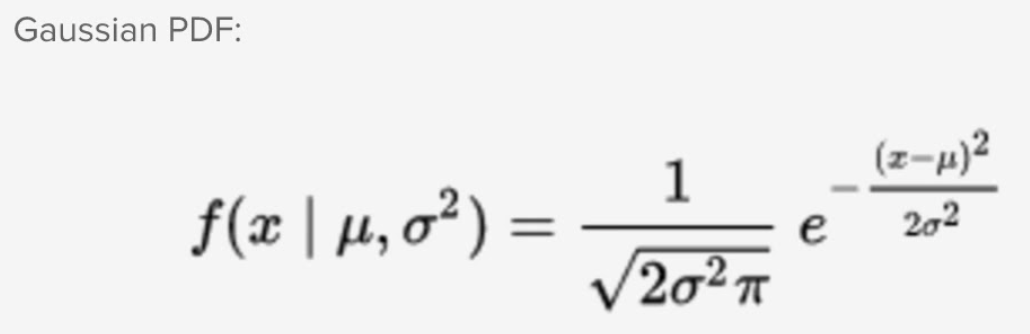

### About the train and test datasets

#### Using the popular Titanic Disaster Dataset's machine learning algorithm to predict passenger survival. 
#### The dataset is taken from one of the Kaggle Competitions, Titanic: Machine Learning from Disaster. There are both train and test datasets that have both continuous and categorical values. 
#### The survival status of individual passengers on the Titanic is listed in the titanic datasets. The titanic datasets do not contain crew data, but they do contain half of the passengers' information.
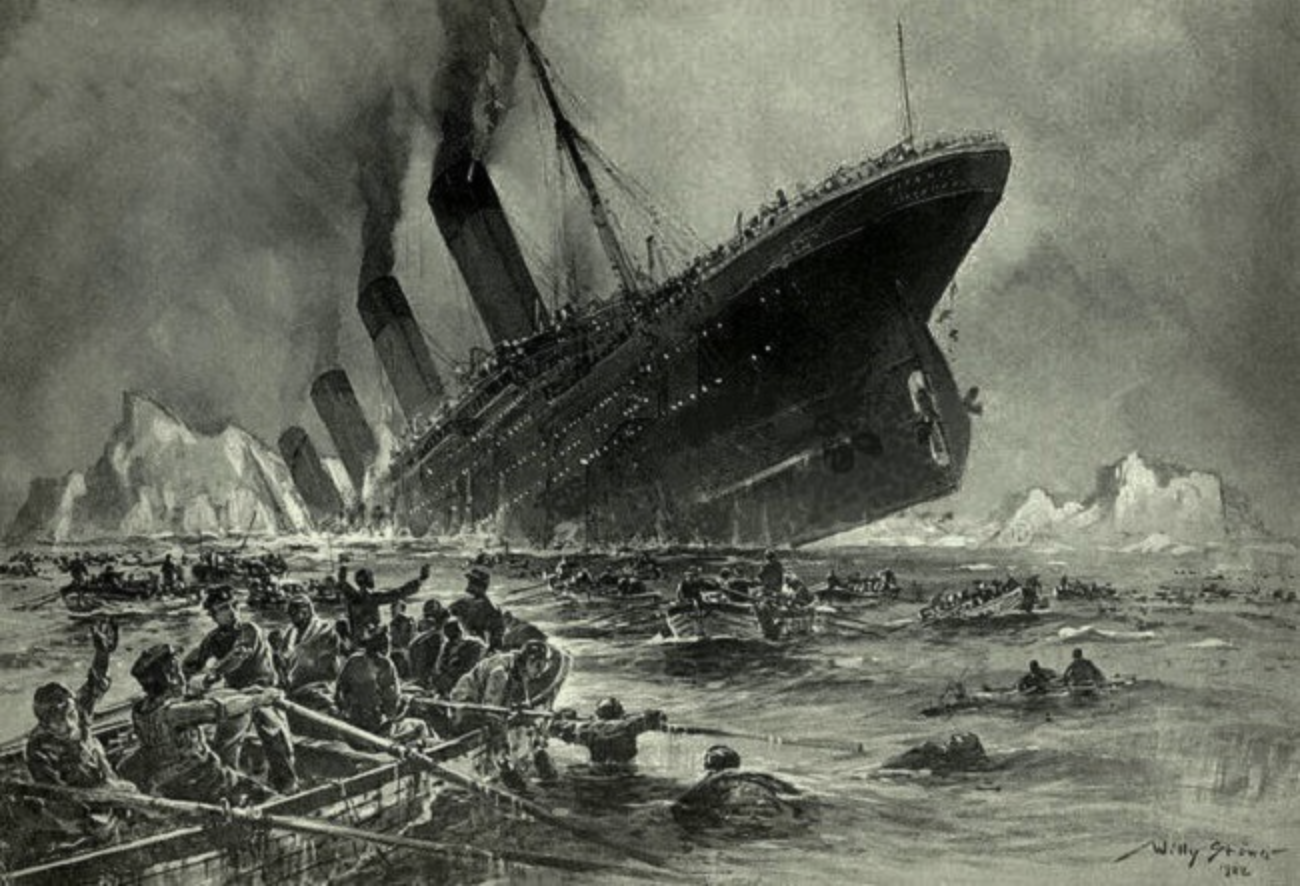

#### Steps followed for this project are,
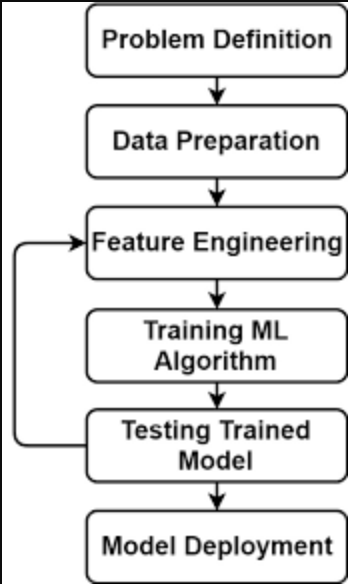

## Loading the dataset

#### The data set is related to the Titanic dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### To remove warnings 

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis (EDA) 

### Dataset Parameters 
#### The train dataset consists of 891 instances and 12 attributes. The test dataset consists of 418 instances and 11 attributes. 
#### All the attributes from the train and test datasets are,
#### The PassengerId feature is the unique ID given to each passenger traveling in Titanic.
#### The Survived feature indicates the number of people on titanic survived or not. 0 = Not survived , 1 = survived.
#### The Pclass feature indicates the ticket classes. Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd.
#### The Name feature is the name of the passenger traveling in Titanic.
#### The Sex feature is the gender of the passenger traveling in Titanic whether male or female.
#### The Age feature is the age of the passenger traveling in Titanic.
#### The SibSp feature indicates the number of siblings/spouses aboard the Titanic.
#### The Parch feature indicates the number of parents/children aboard the Titanic.
#### The Ticket feature indicates the ticket number.
#### The Fare feature indicates the amount to travel in Titanic.
#### The Cabin feature indicates the cabin number in Titanic.
#### The Embarked feature indicates the number of people living in Southampton, Cherbourg, and Queenstown. S = Southampton, C = #### Cherbourg, Q = Queenstown.

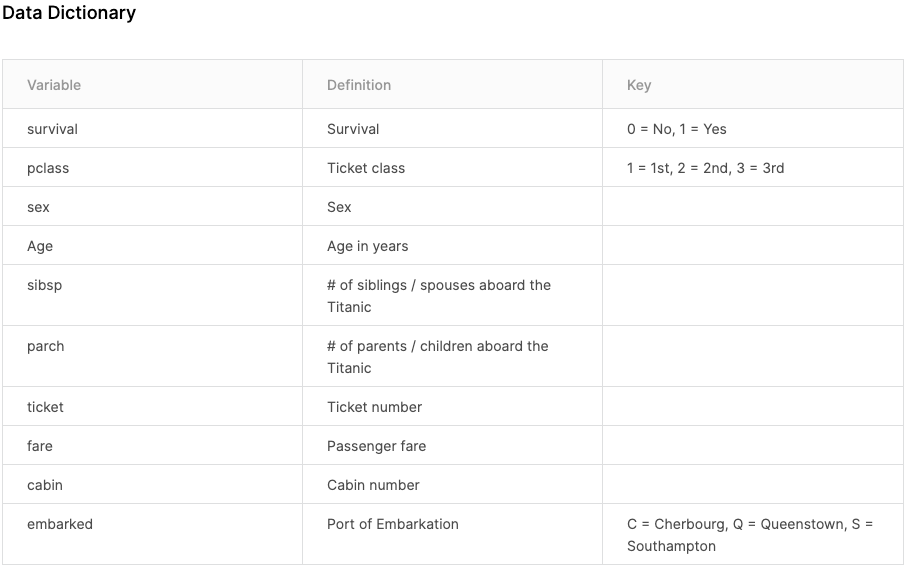

## Data Cleaning

In [4]:
print("Displaying first 5 rows in the train dataset")
train.head()

Displaying first 5 rows in the train dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Displaying last 5 rows in the train dataset")
train.tail()

Displaying last 5 rows in the train dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
print("Displaying first 5 rows in the test dataset")
test.head()

Displaying first 5 rows in the test dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print("Displaying last 5 rows in the test dataset")
test.tail()

Displaying last 5 rows in the test dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
print("Displaying the number of rows in the train dataset")
len(train)

Displaying the number of rows in the train dataset


891

In [9]:
print("Displaying the number of rows and columns in the train dataset")
train.shape

Displaying the number of rows and columns in the train dataset


(891, 12)

In [10]:
print("Displaying the number of rows in the test dataset")
len(test)

Displaying the number of rows in the test dataset


418

In [11]:
print("Displaying the number of rows and columns in the test dataset")
test.shape

Displaying the number of rows and columns in the test dataset


(418, 11)

### Displaying  data present in the csv

#### The datatypes present in the dataset are, 
##### Categorical values - object 
##### Continuous values - int64, float64 

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Checking for Missing values

In [16]:
missing_train = train.isna().sum()
print(missing_train)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
missing_test = test.isna().sum()
print(missing_test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### Percentage of Missing data

In [18]:
train.isna().mean().round(4) * 100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [19]:
test.isna().mean().round(4) * 100

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

#### Age, Cabin, Embarked and Fare features are having missing values.
### Handling Missing values

#### As the Age feature in train and test datasets are 19.98% and 20.57%. So, Imputations can be applied to the Age feature. 
#### Imputations : In imputations, need to replace the missing values with a measure of the central tendency of that feature. For continuous features, the mean or median values are used and for categorical features, the mode is used. This is done so that we don't lose an important feature from the dataset.
#### As we know the Age feature is "float64" i.e., continuous variable from the train and test datasets. So, replacing the Age feature missing values with mean or median.
#### Replacing missing values with the median value of the Age feature in both train and test datasets.

In [20]:
train["Age"].fillna(train["Age"].median(), inplace=True)

In [21]:
test["Age"].fillna(test["Age"].median(), inplace=True)

#### As the Embarked feature missing value is 0.22% in train dataset imputations can be applied here too. But, as the Embarked feature is a categorical variable replacing all the missing values with mode.
#### Replacing missing values with mode value of the Embarked feature in train dataset.

In [22]:
print(f'The number of people living in Southampton are(S)={train[train["Embarked"]=="S"].shape[0]}')
print(f'The number of people living in Cherbourg are(C)={train[train["Embarked"]=="C"].shape[0]}')
print(f'The number of people living in Queenstown are(Q)={train[train["Embarked"]=="Q"].shape[0]}')

The number of people living in Southampton are(S)=644
The number of people living in Cherbourg are(C)=168
The number of people living in Queenstown are(Q)=77


#### As from above result can see that most of the passengers live in Southampton (S), so will replace the missing values in Embarked feature with 'S'.

In [23]:
train.fillna({"Embarked":"S"}, inplace=True)

#### As the Fare feature missing value is 0.24% in test dataset imputations can be applied here too. But, as Fare feature is "float64" i.e., continuous variable from the test dataset. So, replacing the Age feature missing values with mean or median.
#### Replacing missing values with median value of Fare feature in test dataset.

In [24]:
test["Fare"].fillna(test["Fare"].median(), inplace=True)

#### General thumb rule, only features that are missing in excess of 60% of their values should be considered for complete removal.
#### As Cabin feature has missing values of 77.10% in train dataset and 78.23% in test dataset. So, Cabin feature should be removed from the train and test datasets.
#### Dropping Cabin feature because it has more than 60% of missing values in both train and test datasets.

In [25]:
train.drop("Cabin", axis=1, inplace=True)

In [26]:
test.drop("Cabin", axis=1, inplace=True)

#### Checking again for missing values

In [27]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Checking for Outliers
#### Finding outliers using boxplot for "train dataset"

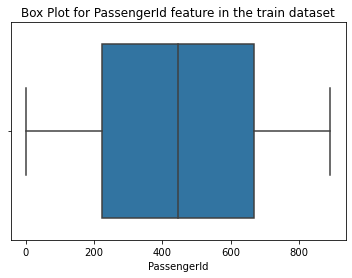

In [29]:
sns.boxplot(train['PassengerId'])
plt.title("Box Plot for PassengerId feature in the train dataset")
plt.show()

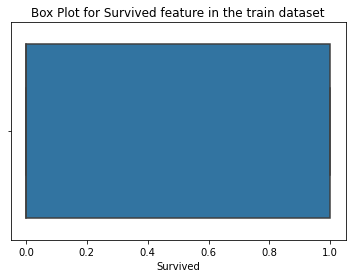

In [30]:
sns.boxplot(train['Survived'])
plt.title("Box Plot for Survived feature in the train dataset")
plt.show()

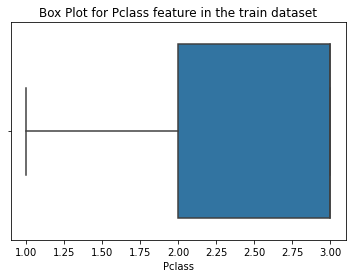

In [31]:
sns.boxplot(train['Pclass'])
plt.title("Box Plot for Pclass feature in the train dataset")
plt.show()

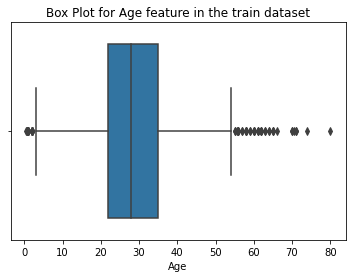

In [32]:
sns.boxplot(train['Age'])
plt.title("Box Plot for Age feature in the train dataset")
plt.show()

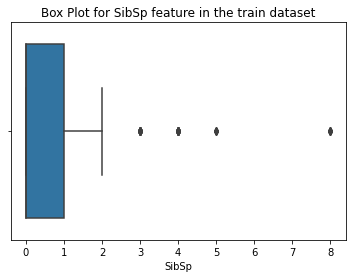

In [33]:
sns.boxplot(train['SibSp'])
plt.title("Box Plot for SibSp feature in the train dataset")
plt.show()

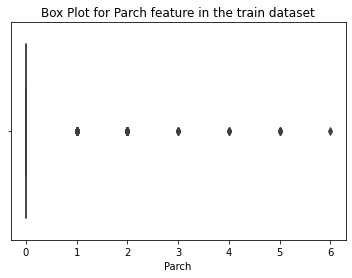

In [34]:
sns.boxplot(train['Parch'])
plt.title("Box Plot for Parch feature in the train dataset")
plt.show()

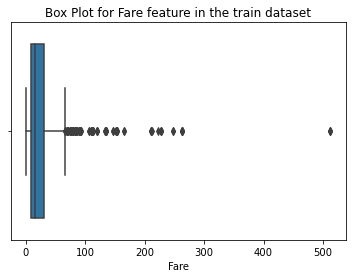

In [35]:
sns.boxplot(train['Fare'])
plt.title("Box Plot for Fare feature in the train dataset")
plt.show()

#### Finding outliers using boxplot for "test dataset"

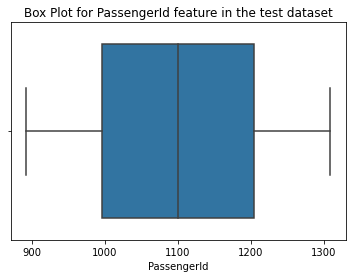

In [36]:
sns.boxplot(test['PassengerId'])
plt.title("Box Plot for PassengerId feature in the test dataset")
plt.show()

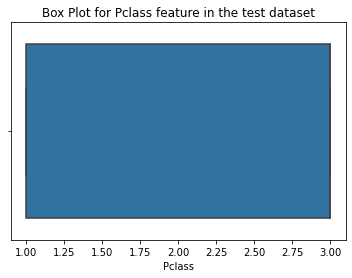

In [37]:
sns.boxplot(test['Pclass'])
plt.title("Box Plot for Pclass feature in the test dataset")
plt.show()

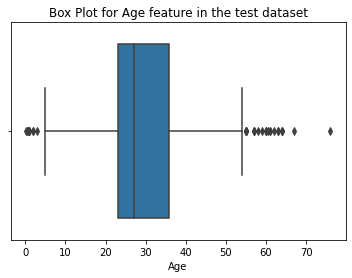

In [38]:
sns.boxplot(test['Age'])
plt.title("Box Plot for Age feature in the test dataset")
plt.show()

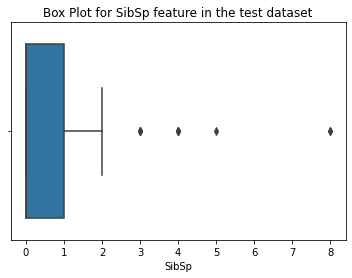

In [39]:
sns.boxplot(test['SibSp'])
plt.title("Box Plot for SibSp feature in the test dataset")
plt.show()

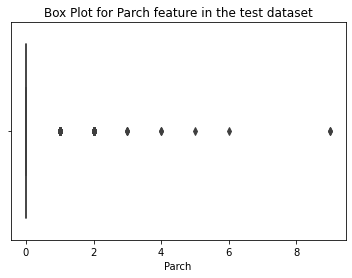

In [40]:
sns.boxplot(test['Parch'])
plt.title("Box Plot for Parch feature in the test dataset")
plt.show()

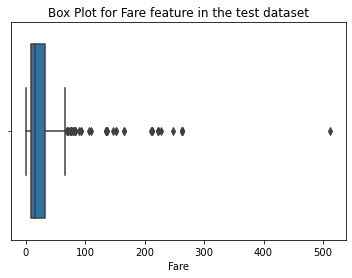

In [41]:
sns.boxplot(test['Fare'])
plt.title("Box Plot for Fare feature in the test dataset")
plt.show()

#### The outliers for train and test datasets features are: Age, SibSp, Parch, Fare.
#### The Age feature is a valid outlier because there are small babies below 1 year old and nearly 80 years old people tarveled in titanic.
#### The SibSp feature defines the family relations  in this way, Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored). So, SibSp feature is a valid outlier because a person traveling in titanic can have their family members along with them.
#### The Parch feature defines the family relations in this way, Parent = mother, father; Child = daughter, son, stepdaughter, stepson; some children travelled only with a nanny, therefore Parch=0 for them. So, Parch is also a valid outlier.
#### The Fare feature defines the passenger fare. Even, Fare feature is a valid outlier because depending on type of rooms, living style, etc.. a person chooses to pay the fare differs.

### Finding number of unique values in each feature of train and test datasets

In [42]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [43]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Embarked         3
dtype: int64

### Data Visualization
#### Done different data visualizations to know the relationship between different features along with a heat map.

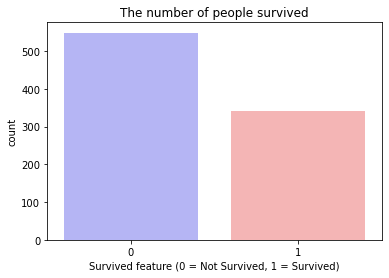

In [44]:
sns.countplot(x="Survived", data=train, palette="bwr")
plt.title('The number of people survived')
plt.xlabel("Survived feature (0 = Not Survived, 1 = Survived)")
plt.show()

##### From the above bar graph can see that more passengers are not survived.

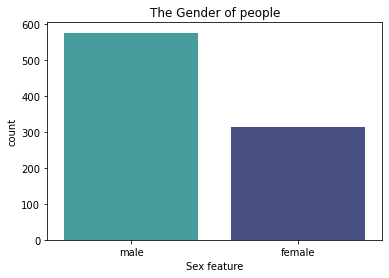

In [45]:
sns.countplot(x="Sex", data=train, palette="mako_r")
plt.title('The Gender of people')
plt.xlabel("Sex feature")
plt.show()

In [46]:
countFemale = len(train[train.Sex == "female"])
countMale = len(train[train.Sex == "male"])
print("Percentage of Female Passengers: {:.2f}%".format((countFemale / (len(train.Sex))*100)))
print("Percentage of Male Passengers: {:.2f}%".format((countMale / (len(train.Sex))*100)))

Percentage of Female Passengers: 35.24%
Percentage of Male Passengers: 64.76%


##### From the above bar graph and percentage calculations can see that there are more male passengers when compared to female passengers.

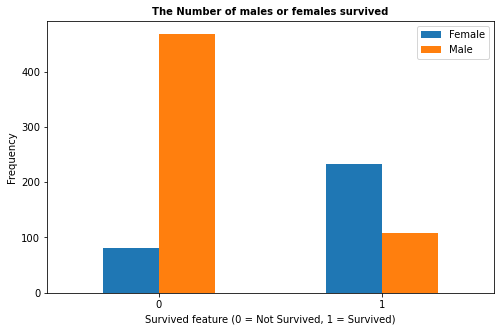

In [47]:
pd.crosstab(train.Survived,train.Sex).plot(kind="bar",figsize=(8,5))
plt.title('The Number of males or females survived',size = 10, fontweight = 'bold')
plt.xlabel('Survived feature (0 = Not Survived, 1 = Survived)', fontsize = 10)
plt.xticks(rotation=0)
plt.legend(["Female", "Male"])
plt.ylabel('Frequency', fontsize = 10)
plt.show()

##### The above bar chart shows that females are more likely survived than male.

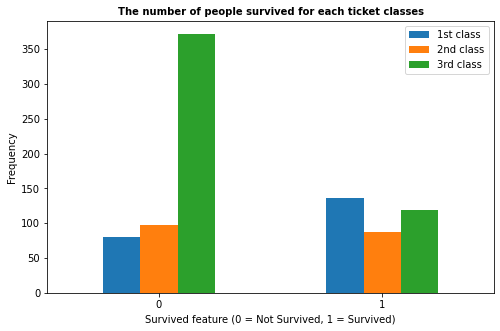

In [48]:
pd.crosstab(train.Survived,train.Pclass).plot(kind="bar",figsize=(8,5))
plt.title('The number of people survived for each ticket classes',size = 10, fontweight = 'bold')
plt.xlabel('Survived feature (0 = Not Survived, 1 = Survived)', fontsize = 10)
plt.xticks(rotation=0)
plt.legend(["1st class", "2nd class","3rd class"])
plt.ylabel('Frequency', fontsize = 10)
plt.show()

##### The above bar chart shows that 1st class people are more likely survived than 2nd and 3rd classes.
##### The above bar chart shows that 3rd class people are more likely not survived than 1st and 2nd classes.

In [49]:
def bar_chart(feature):
    not_survived = train[train['Survived']==0][feature].value_counts()
    survived = train[train['Survived']==1][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index = ['Survived','Not Survived']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

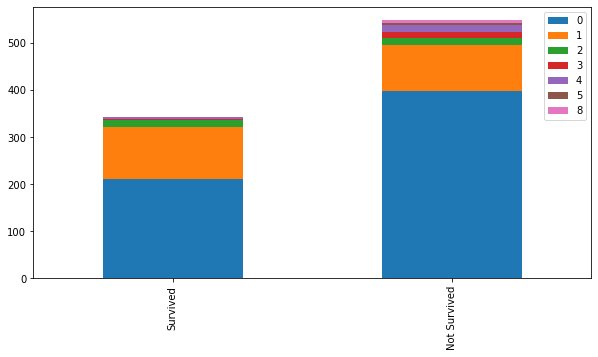

In [50]:
bar_chart('SibSp')

##### The above bar chart shows that a person aboarded with zero(0) siblings/spouses are more likely to be not survived.

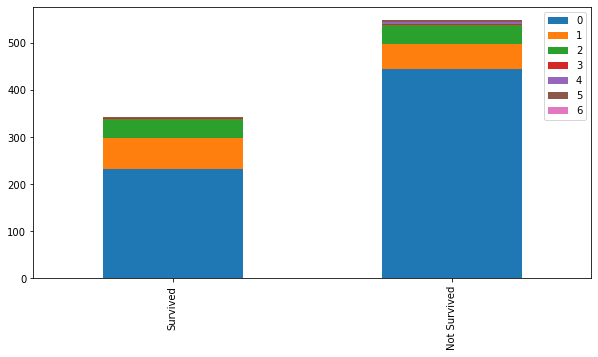

In [51]:
bar_chart('Parch')

##### The above bar chart shows that a person aboarded with zero(0) parents/children are more likely to be not survived.

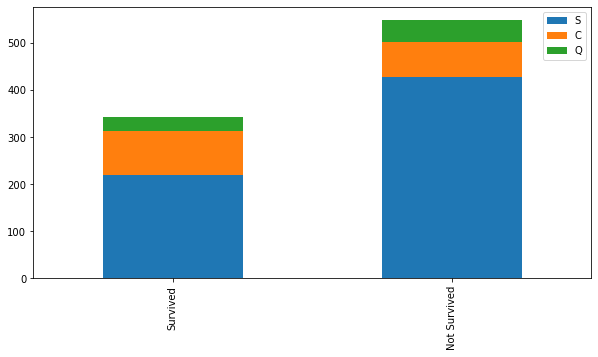

In [52]:
bar_chart('Embarked')

##### The above bar chart shows that a person living in Southampton are more likely to be not survived.

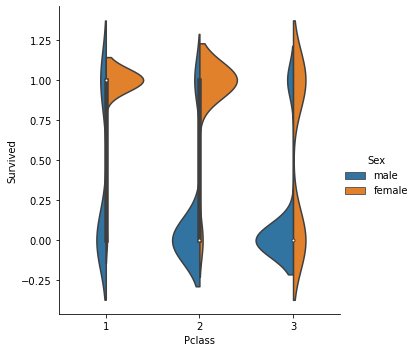

In [53]:
sns.catplot(data=train, kind="violin", x="Pclass", y="Survived", hue="Sex", split=True)

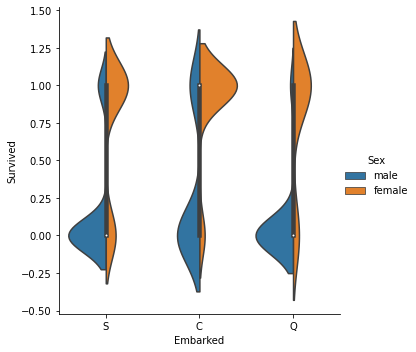

In [54]:
sns.catplot(data=train, kind="violin", x="Embarked", y="Survived", hue="Sex", split=True)

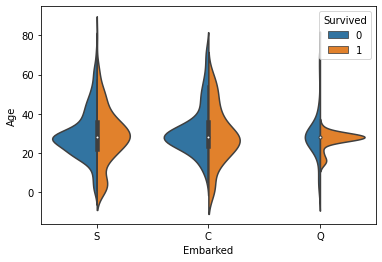

In [55]:
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True)

##### From the above violinplot can be seen that,
##### Almost all the children age between 0 to 20 years people living in Southampton are survived.

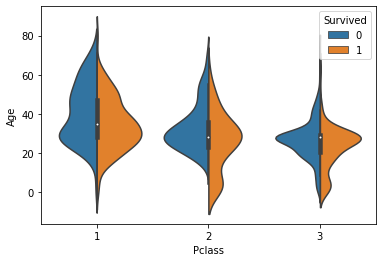

In [56]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True)

##### From the above violinplot can be seen that,
##### Almost all the children age between 0 to 10 years of 2nd class tickets are survived.
##### Almost all the children of 3rd class tickets are survived.

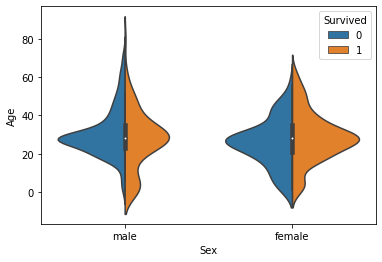

In [57]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True)

##### From the above violinplot can be seen that,
##### Almost all the female children of all age group of are survived.
##### Most of the male children between age 0 to 14 are survived.

### Relationship between Continuous features

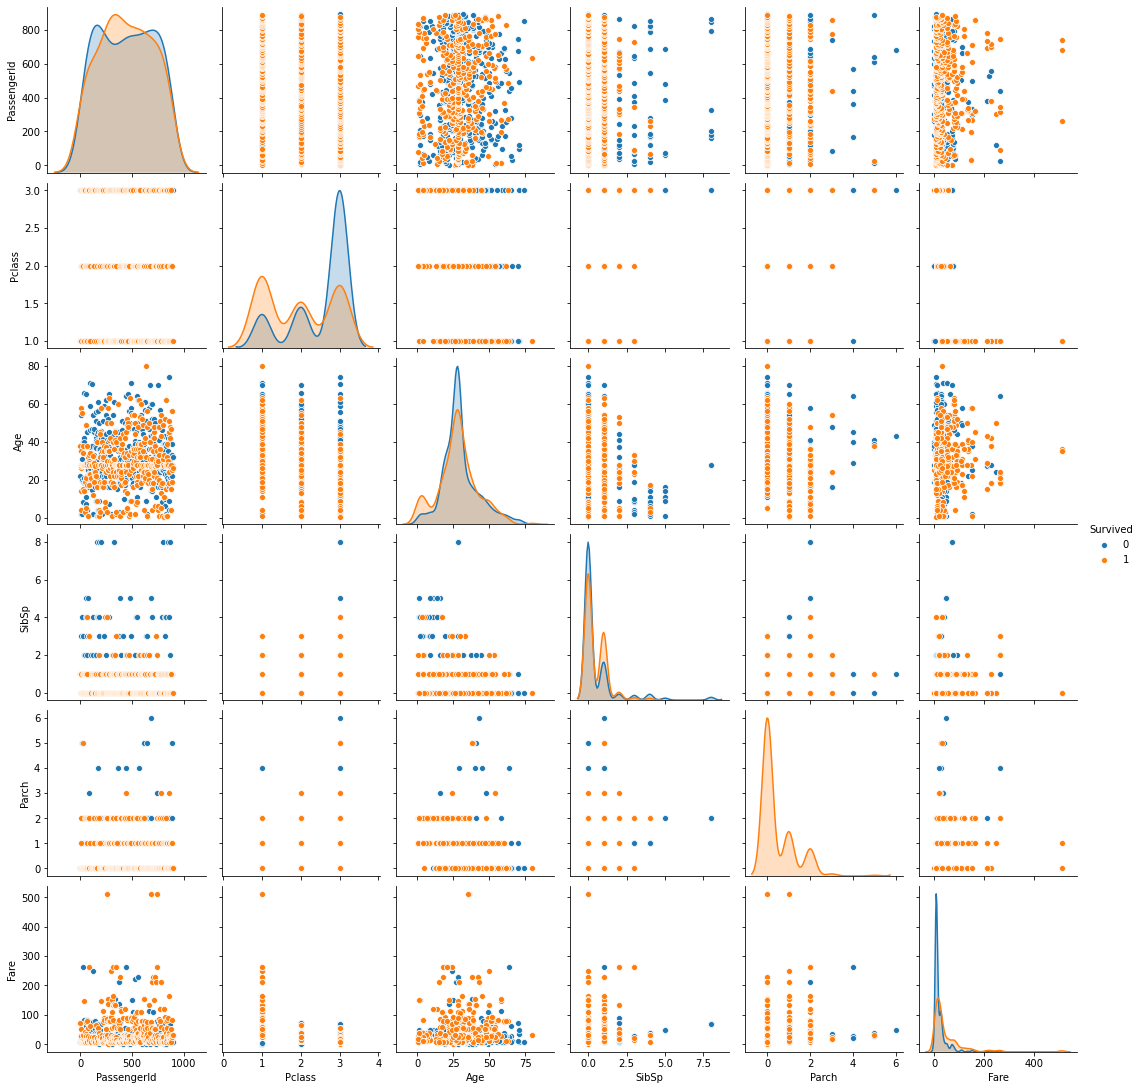

In [58]:
sns.pairplot(train,hue='Survived' )

### Heat Map / Correlation plot

#### Getting correlations of each features in train dataset

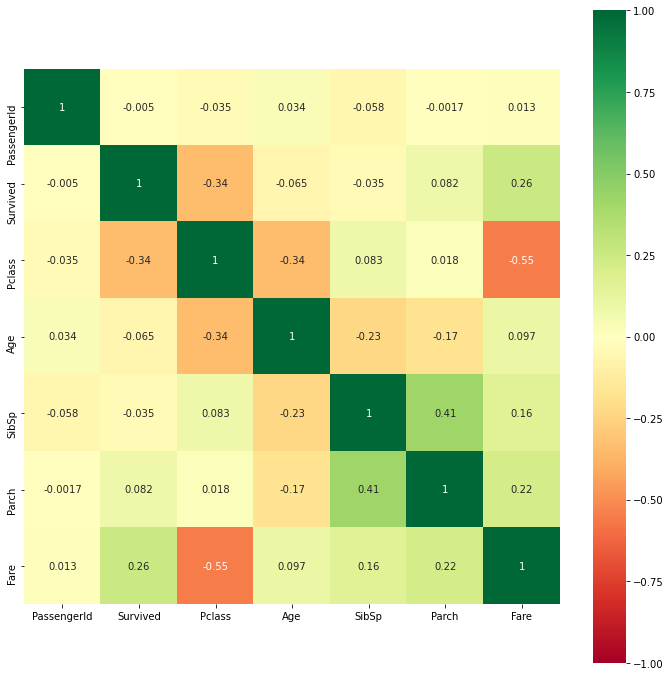

In [59]:
corrmat = train.corr()
fig = plt.figure(figsize = (12,12))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1,cmap="RdYlGn")
plt.show()

#### Getting correlations of each features in test dataset

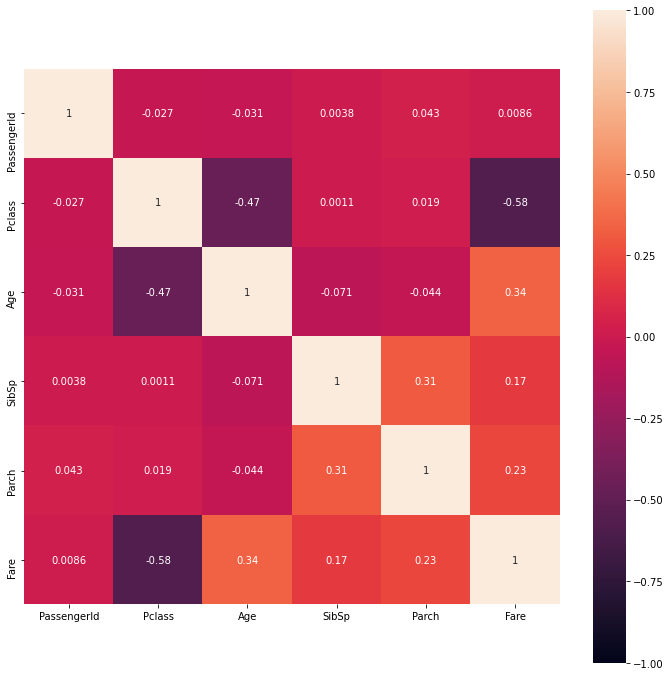

In [60]:
corrmat = test.corr()
fig = plt.figure(figsize = (12,12))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

### Feature Engineering

##### The method of using domain knowledge of data is feature engineering. To create characteristics that make machine learning algorithms work (feature vectors). A vector of characteristics is an n-dimensional vector of numerical characteristics representing an entity. A numerical representation of objects is needed by many algorithms in machine learning, as such representations enable processing and statistical analysis.

#### 1. Sex feature

###### Converting Categorical features into Continuous variables for Sex feature
###### Converting male=0 and female=1

In [61]:
# Merging train and test datasets
train_test = [train, test] 

In [62]:
for i in train_test:
    i.loc[ i["Sex"] == "male", "Sex"] = 0,
    i.loc[ i["Sex"] == "female", "Sex"] = 1

#### 2. Age feature

###### Converting numerical variables into Categorical variables for Age feature
###### The binning method is to define a series of ranges for the continuous features that correspond to the level of new categorical features to create.
###### Converting variables, child=0, young=1, adult=2, mid-age=3, senior=4

In [63]:
for j in train_test:
    j.loc[ j['Age'] <= 16, 'Age'] = 0,
    j.loc[(j['Age'] > 16) & (j['Age'] <= 26), 'Age'] = 1,
    j.loc[(j['Age'] > 26) & (j['Age'] <= 36), 'Age'] = 2,
    j.loc[(j['Age'] > 36) & (j['Age'] <= 62), 'Age'] = 3,
    j.loc[ j['Age'] > 62, 'Age'] = 4

#### 3. Fare feature

###### Converting numerical variables into Categorical variables for Fare feature
###### The binning method is to define a series of ranges for the continuous features that correspond to the level of new categorical features to create.
###### Converting variables, fare<=17: 0, fare>17 and fare<=30: 1,  fare>30 and fare<=100: 2, fare>100: 3

In [64]:
for k in train_test:
    k.loc[ k['Fare'] <= 17, 'Fare'] = 0,
    k.loc[(k['Fare'] > 17) & (k['Fare'] <= 30), 'Fare'] = 1,
    k.loc[(k['Fare'] > 30) & (k['Fare'] <= 100), 'Fare'] = 2,
    k.loc[ k['Fare'] > 100, 'Fare'] = 3

#### 4. Embarked feature

###### Converting numerical variables into Categorical variables for Embarked feature
###### The binning method is to define a series of ranges for the continuous features that correspond to the level of new categorical features to create.
###### Converting variables, embarked=S: 0, embarked=C: 1, embarked=Q: 2 

In [65]:
for l in train_test:
    l.loc[ l['Embarked'] == 'S', 'Embarked'] = 0,
    l.loc[ l['Embarked'] == 'C', 'Embarked'] = 1,
    l.loc[ l['Embarked'] == 'Q', 'Embarked'] = 2

#### Checking whether all features are converted

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,0


In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,0.0,2
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,0.0,0


#### Dropping unnecessary features from the train and test datasets that are not useful for model building

#### 5. Name feature

In [68]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

#### 6. Ticket feature

In [69]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

#### 7. PassengerId feature in train dataset

In [70]:
train.drop('PassengerId', axis=1, inplace=True)

In [71]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,3.0,1,0,2.0,1
2,1,3,1,1.0,0,0,0.0,0
3,1,1,1,2.0,1,0,2.0,0
4,0,3,0,2.0,0,0,0.0,0


In [72]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2.0,0,0,0.0,2
1,893,3,1,3.0,1,0,0.0,0
2,894,2,0,3.0,0,0,0.0,2
3,895,3,0,2.0,0,0,0.0,0
4,896,3,1,1.0,1,1,0.0,0


### Feature Selection Techniques

#### Feature selection is a method in which certain features that most apply to the prediction variable can be selected from the dataset. By using feature selection can reduce the overfitting, increase accuracy, and reduces training time. 
#### Used Univariate analysis using selectKBest with chi2 because it picks those features that have the best relationship with the output variable, using statistical tests.

#### Univariate Selection

In [73]:
X=train.iloc[:,:]
y=train["Survived"]

In [74]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,3.0,1,0,2.0,1
2,1,3,1,1.0,0,0,0.0,0
3,1,1,1,2.0,1,0,2.0,0
4,0,3,0,2.0,0,0,0.0,0


In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [76]:
# Applying SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k='all')
ordered_feature=ordered_rank_features.fit(X,y)

In [77]:
train_scores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
train_columns=pd.DataFrame(X.columns)

In [78]:
features_rank=pd.concat([train_columns,train_scores],axis=1)

In [79]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Survived,549.000000
1,Pclass,30.873699
2,Sex,170.348127
3,Age,2.383487
4,SibSp,2.581865
5,Parch,10.097499
6,Fare,94.134898
7,Embarked,11.353117


In [80]:
features_rank.nlargest(10,'Score')

,Features,Score
0,Survived,549.000000
2,Sex,170.348127
6,Fare,94.134898
1,Pclass,30.873699
7,Embarked,11.353117
5,Parch,10.097499
4,SibSp,2.581865
3,Age,2.383487


#### Feature Importance
##### This technique gives you a score for each feature of your data,the higher the score the more relevant it is.

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [82]:
print(model.feature_importances_)

[0.80048479 0.03156068 0.12188976 0.00645665 0.00743366 0.00570689
 0.02012224 0.00634532]


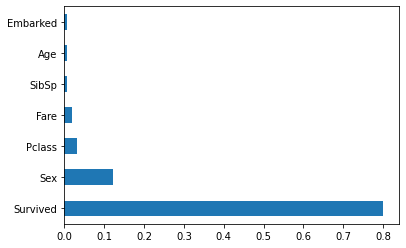

In [83]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(7).plot(kind='barh')
plt.show()

#### Correlation Matrix

In [84]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.072077,-0.035322,0.081629,0.292884
Pclass,-0.338481,1.000000,-0.286667,0.083081,0.018443,-0.693736
Age,-0.072077,-0.286667,1.000000,-0.228235,-0.165474,0.064225
SibSp,-0.035322,0.083081,-0.228235,1.000000,0.414838,0.341187
Parch,0.081629,0.018443,-0.165474,0.414838,1.000000,0.364097
Fare,0.292884,-0.693736,0.064225,0.341187,0.364097,1.000000


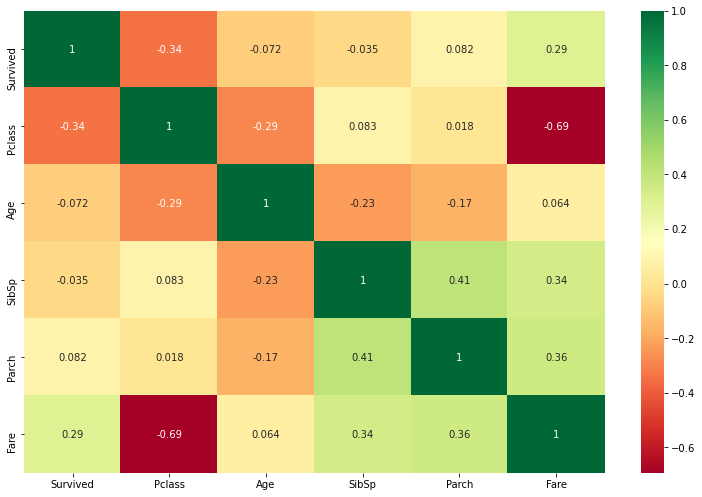

In [85]:
import seaborn as sns
corr=train.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(13,8.5))
sns.heatmap(train[top_features].corr(),annot=True,cmap='RdYlGn')

#### Dropping the target feature i.e., Survived feature from the train dataset.

In [86]:
features = train.drop(['Survived'], axis=1).columns

X = train[features].values

In [87]:
features = test.drop(['PassengerId'], axis=1).columns

test_X = test[features].values

### Feature Scaling 

##### The StandardScaler, which by eliminating the mean and scaling to unit variance, standardizes the characteristics. Using the StandardScaler for Titanic datasets.
##### Unit variance implies that the standard deviation separates all the values. Used StandardScalar() for feature transformation. Plotted a heat map using feature selection.
##### Only 68% of the time, the maximum and minimum values lies between -1 and +1.

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_X_scaled = scaler.fit_transform(test_X)

print('The minimum value is {} and the maximum value is {}'.format(X_scaled.min(), X_scaled.max()))

The minimum value is -1.8516290279940215 and the maximum value is 6.974147318082627


### Machine Learning Model 

### Naive Bayes - Gaussian Naive Bayes classifier
##### Naive Bayes is a simple and effective tool that can be tested and use for problems with classification.  It is easy to understand, provides good results, and creating a model and making predictions is fast. 
##### For building the Machine Learning model used the Gaussian Naive Bayes classifier as it is assumed that continuous values linked to each function are distributed according to a normal distribution.

In [89]:
import numpy as np
import math

class NaiveBayes():
    def fit_model(self, X, y):
        self.classes = np.unique(y)
        statistics_shape = (len(np.unique(y)), X.shape[1])

        self.mean = np.zeros(statistics_shape, dtype=np.float64)
        self.variance = np.zeros(statistics_shape, dtype=np.float64)
        self.probs = np.zeros(len(self.classes), dtype=np.float64)
        
        for cls in np.unique(y):
            X_where_c = X[np.where(y == cls)]
            self.mean[cls,:]=X_where_c.mean(axis=0)
            self.variance[cls,:]=X_where_c.var(axis=0)
            self.probs[cls] = X_where_c.shape[0] / float(X.shape[0])
    
    def probability_density_function(self, i, x):
        mean = self.mean[i]
        variance = self.variance[i]
        probs = []
        eps = 1e-4
        for i in range(len(mean)):
            exponent =  np.exp(int(-(x[i] - mean[i])**2 / (2 * variance[i] + eps)))
            coeff = 1.0 / np.sqrt(2 * np.pi * variance[i] + eps)
            probs.append(exponent * coeff)
        return np.array(probs)

    def classify(self, sample):
        posteriors = []
        for i, c in enumerate(np.unique(y)):
            prior = np.log(self.probs[i])
            class_conditional = np.sum(np.log(self.probability_density_function(i, sample)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return(self.classes[np.argmax(posteriors)])

    def predict_model(self, X):
        y_pred = [self.classify(sample) for sample in X]
        return y_pred

In [90]:
def main():
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

    clf = NaiveBayes()
    clf.fit_model(X_train, y_train)
    y_pred = clf.predict_model(X_test)
    
    accuracy_score = accuracy(y_test, y_pred)
    print ("Accuracy Score for Naive Bayes Model:", accuracy_score)
    
    y_pred_test = clf.predict_model(test_X_scaled)

    submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred_test})

    print(submission.head())
    
    filename = 'Final Submission.csv'
    submission.to_csv(filename,index=False)
    print('Saved file: ' + filename)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    return accuracy

if __name__ == "__main__":
    main()

Accuracy Score for Naive Bayes Model: 0.8100558659217877
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
Saved file: Final Submission.csv


### References:
#### 1. https://www.kaggle.com/c/titanic
#### 2. https://www.marineinsight.com/maritime-history/get-the-real-truth-reason-behind-the-sinking-of-titanic/
#### 3. https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/
#### 4. https://www.geeksforgeeks.org/naive-bayes-classifiers/
#### 5. https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
#### 6. https://machinelearningmastery.com/naive-bayes-for-machine-learning/